# Lista 05 - IC + Teste de Hipóteses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.stats import binom

# Exercício 1

Utilize o dataset dados-covid-mg para explorar a seguinte hipótese:

Hipótese: Em MG cerca de 50% da população já foi detectada com COVID.

Dataset obtido no openDataSUS, um recorte do estado de MG. Para facilitar, algumas colunas foram removidas e o atributo classificacaoFinal foi binarizado.

In [2]:
df = pd.read_csv('dados-covid-mg.csv')
df.head()

,id,profissionalSaude,tipoTeste,resultadoTeste,estado,municipio,classificacaoFinal
0,R3y2Di9K0s,Não,RT-PCR,Negativo,MINAS GERAIS,Varginha,0
1,4awz0HPaCl,Sim,RT-PCR,Negativo,MINAS GERAIS,Carmópolis de Minas,0
2,0RjrlH0bs5,Não,NaN,NaN,MINAS GERAIS,Conselheiro Lafaiete,0
3,83B4gJDLpU,Não,NaN,NaN,MINAS GERAIS,Mariana,0
4,H8GKXacI4T,Não,NaN,NaN,MINAS GERAIS,Januária,0


A) Calcule a prevalência de infectados na amostra, armazene na variável p.

In [3]:
# YOUR CODE HERE
p = len(df[df['classificacaoFinal']==1])/len(df)
p
#raise NotImplementedError()

0.409622523888832

B) Calcule a variância (utilizando p), armazene em var.

In [4]:
# YOUR CODE HERE
var = p*(1-p)
var
#raise NotImplementedError()

0.24183191181177527

C) Calcule o intervalo de confiança dessa estimativa, considerando 95% de chance. O resultado deve ser uma tupla a,b armazenada em ic.

In [5]:
# YOUR CODE HERE
inferior = p - 1.96*math.sqrt(var)/math.sqrt(len(df))
superior = p + 1.96*math.sqrt(var)/math.sqrt(len(df))
ic = (inferior, superior)
ic
#raise NotImplementedError()

(0.40754359272076335, 0.4117014550569007)

D) Quais as afirmações analíticas podem ser feitas com base nessa exploração? Se julgar necessário plote gráficos que corroborem a análise.

p nos diz que 40.96% dos pacientes na amostra estão infectados.

O intervalo de confiança nos diz que, caso fossem feitas outras amostragens parecidas, 95% delas teriam uma quantidade de contaminados variando entre 40.75% e 41.17%

Assim, podemos concluir que a quantidade de contaminados na população brasileira muito provavelmente também gira em torno de 40.96%, podendo variar entre 40.75% e 41.17%

# Exercício 2

Hipótese Nula: A prevalência de COVID para profissionais de saúde é igual a de não profissionais de saúde.

Utilize o teste de permutação para randomizando os dados, aproximar o p-valor e validar se a hipótese é aceita.

In [6]:
#Convertendo as series para numpy
profissionais = df['profissionalSaude'].to_numpy()
classificacaoFinal = df['classificacaoFinal'].to_numpy()

A) Calcule t_obs, armazene em t_obs.

In [7]:
# YOUR CODE HERE

def calcula_t_obs(profissionais, classificacaoFinal):
    prof = len(profissionais[profissionais == 'Sim'])
    profcont = len(classificacaoFinal[(profissionais == 'Sim') & (classificacaoFinal == 1)])
    mediaprof = profcont/prof

    naoprof = len(profissionais) - prof
    naoprofcont = len(classificacaoFinal[(profissionais == 'Não') & (classificacaoFinal == 1)])
    medianaoprof = naoprofcont/naoprof

    t_obs = mediaprof - medianaoprof

    return t_obs

t_obs = calcula_t_obs(profissionais, classificacaoFinal)
t_obs
#raise NotImplementedError()

-0.12349460937176582

B) Implemente o teste de permutação para os dados

Relembrando: Shuffle, computar diferença média, fazer isso n vezes.

Para sua análise utilize o valor de N que considerar adequado, no entanto na entrega fixe N em 1000. Armazene a lista de diferenças em diferencas.

In [8]:
# YOUR CODE HERE
n = 1000
tamAms = len(profissionais)
medias = np.zeros(n)

for i in range(n):
    profs = np.random.permutation(profissionais)
    medias[i] = calcula_t_obs(profs, classificacaoFinal)

#raise NotImplementedError()

C) Plote o histograma e avalie qual a chance de um t_obs maior que os dados.

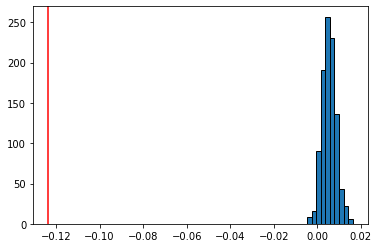

In [9]:
# YOUR CODE HERE
plt.hist(medias, edgecolor='black')
plt.axvline(t_obs, color='red')
plt.show()
#raise NotImplementedError()

D) A hipótese nula é aceita ou rejeitada? Explique

Ela é rejeitada. Porque, na hipótese nula, é esperado que haja pouca diferença entre a prevalência de COVID-19 em profissionais da saúde e nas outras pessoas, girando em torno de 1% de prevalência maior nos profissionais da saúde.

Entretanto, o valor observado é de uma prevalência 12% maior em quem não trabalha na área da saúde do que naqueles que trabalham. Esse valor na hipótese nula é tão improvável que está completamente disjunto das médias calculadas, o que nos faz rejeitar a hipótese nula e concluir que a prevalência de COVID-19 <b>não</b> é a mesma em profissionais da saúde e não profissionais da saúde.